In [1]:
# !pip install mglearn
import mglearn

# 지도학습 - 규제선형모델 (Ridge_Lasso_Regression)


Linear Regression의 문제

- 단순 선형회귀 : 단 하나의 특성(feature)을 가지고 라벨값(label) 또는 타깃(target)을 예측하기 위한
회귀 모델을 찾는 것
- 다중 선형회귀 : 여러 개의 특성을 활용해서 회귀모델을 찾는 것




다중 선형 회귀 모델은 과대적합(overfitting) 될 때가 종종 발생

주어진 샘플들의 특성값들과 라벨값의 관계를 필요이상으로 너무 자세하게 복잡하게 분석했다는 것
- 새로운 데이터가 주어졌을 때 제대로 예측해내기가 어려움 (일반화 능력이 떨어짐)
- Ridge / Lasso / Elastic Regression 등장

정규화(Regularization, 규제)

- 과대적합이 되지 않도록 모델을 강제로 제한하는 것을 의미.
- 가중치(w)의 값을 조정하여 제약을 주는 것.

- L1 규제 : Lasso
  - <font  color=red>w의 모든 원소에 똑같은 힘으로 규제를 적용하는 방법. 특정 계수들은 0이 됨.      
  - 특성선택(Feature Selection)이 자동으로 이루어진다.</font>

- L2 규제 : Ridge
  - <font  color=red>w의 모든 원소에 골고루 규제를 적용하여 0에 가깝게 만든다.</font>


## Ridge Regression

평균제곱오차식에 alpha 항이 추가
- alpha 값을 크게 하면 패널티 효과가 커지고(가중치 감소),
- alpha 값을 작게 하면 그 반대가 된다.

Ridge()
```
Ridge(alpha, fit_intercept, normalize, copy_X, max_iter, tol, solver, random_state)
```

- alpha : 값이 클수록 강력한 정규화(규제) 설정하여 분산을 줄임, 양수로 설정
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- normalize : 매개변수 무시 여부
- copy_X : X의 복사 여부
- max_iter : 계산에 사용할 작업 수
- tol : 정밀도
- solver : 계산에 사용할 알고리즘 (auto, svd, cholesky, lsqr, sparse_cg, sag, saga)
- random_state : 난수 seed 설정


#### Ridge_Lasso_Regression 실습 01

확장 보스턴 집값 셋에 선형회귀 적용

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
%matplotlib inline

In [3]:
# 확장 보스턴 집값
from sklearn.model_selection import train_test_split
import mglearn

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
mode_lr = LinearRegression().fit(X_train, y_train)

In [4]:
# 훈련 세트 점수
mode_lr.score(X_train, y_train)

0.9520519609032729

In [5]:
# 테스트 세트 점수
mode_lr.score(X_test, y_test)

0.607472195966585

- 훈련 셋에 비해 테스트 셋의 경우 정확도가 많이 떨어짐 -> 과대적합

확장 보스턴 집값 셋에 릿지회귀 적용

In [6]:
# model_ridge
model_ridge = Ridge().fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(model_ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(model_ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [7]:
# model_ridge_alpha_10
model_ridge_alpha_10 = Ridge(alpha=10).fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(model_ridge_alpha_10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(model_ridge_alpha_10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [8]:
# model_ridge_alpha_01
model_ridge_alpha_01 = Ridge(alpha=0.1).fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(model_ridge_alpha_01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(model_ridge_alpha_01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


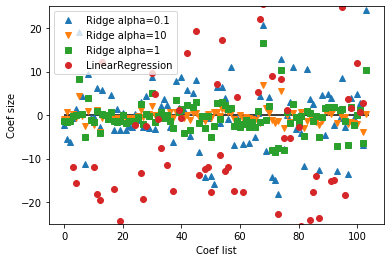

In [9]:
# α 값의 변화에 따른 가중치 (coef_)의 변화
plt.plot(model_ridge_alpha_01.coef_, '^', label='Ridge alpha=0.1')
plt.plot(model_ridge_alpha_10.coef_, 'v', label='Ridge alpha=10')
plt.plot(model_ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(mode_lr.coef_, 'o', label='LinearRegression')

plt.hlines(0, 0, len(mode_lr.coef_))

plt.xlabel("Coef list") # 가중치(w) 목록
plt.ylabel("Coef size") # 가중치(w) 값

plt.ylim(-25, 25)
plt.legend()

- x 축은 coef_의 원소를 위치대로 나열한 것 (x=0은 첫 번째 특성에 연관된 계수이고 x=1은 두 번째 특성에 연관된 계수로 x=100까지 계속)
- y 축은 각 계수의 수치

- alpha=10일 때 대부분의 계수는 -3과 3 사이에 위치
- alpha=1일 때 Ridge 모델의 계수는 좀 더 증가
- alpha=0.1일 때 계수는 더 커지며 아무런 규제가 없는(alpha=0) 선형 회귀의 계수는 값이 더 커져 그림 밖으로 넘어감.

## Lasso Regression

- 릿지 회귀의 단점을 해결하기 위해 대안으로 나온 방법
학습한 가중치의 절대값을 규제항(L1 규제)으로 사용 – 가중치의 절대값의 합을 사용
- 적당한 α만으로 몇몇 계수를 정확하게 0으로 만들 수 있음  해석을 용이하게 함
- MSE와 규제항의 합이 최소가 되게 하는 파라미터 W와 b를 찾는 것이 Lasso의 목표
- MSE항이 작아질 수록 오차가 작아지고, L1-norm이 작아질 수록 많은 가중치들이 0이 되거나 0에 가까워짐  데이터 전 처리에 주로 사용 (필요 없는 데이터 제거)
- Ridge와 Lasso의 성능 차이는 사용하는 데이터의 상황에 따라 다름  유의미한 변수가 적을 때는 Lasso가 반대의 경우는 Ridge가 더 좋은 성능을 보임.

Lasso()
```
Lasso(alpha, fit_intercept, normalize, precompute, copy_X, max_iter, tol, warm_start, positive, solver, random_state, selection)
```
- alpha : 값이 클수록 강력한 정규화(규제) 설정하여 분산을 줄임, 양수로 설정
- fit_intercept : 모형에 상수항 (절편)이 있는가 없는가를 결정하는 인수 (default : True)
- normalize : 매개변수 무시 여부
- precompute : 계산속도를 높이기 위해 미리 계산된 그램 매트릭스를 사용할 것인지 여부
- copy_X : X의 복사 여부
- max_iter : 계산에 사용할 작업 수
- tol : 정밀도
- warm_start : 이전 모델을 초기화로 적합하게 사용할 것인지 여부
- positive : 계수가 양수로 사용할 것인지 여부
- solver : 계산에 사용할 알고리즘 (auto, svd, cholesky, lsqr, sparse_cg, sag, saga)
- random_state : 난수 seed 설정
- selection : 계수의 업데이트 방법 설정 (random으로 설정하면 tol이 1e-4보다 높을 때 빠른 수렴)

In [11]:
from sklearn.linear_model import Lasso

# lasso
model_lasso = Lasso().fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(model_lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(model_lasso.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(   np.sum( model_lasso.coef_ != 0 )   ))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 수: 4


In [12]:
# "max_iter" 기본값을 증가시키지 않으면 max_iter 값을 늘리라는 경고가 발생합니다.
# lasso001
model_lasso001 = Lasso(alpha=0.01, max_iter=10000).fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(model_lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(model_lasso001.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(   np.sum( model_lasso001.coef_ != 0 )   ))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 수: 33


In [13]:
# lasso00001
model_lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print("훈련 세트 점수: {:.2f}".format(model_lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(model_lasso00001.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(   np.sum( model_lasso00001.coef_ != 0 )   ))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 수: 96


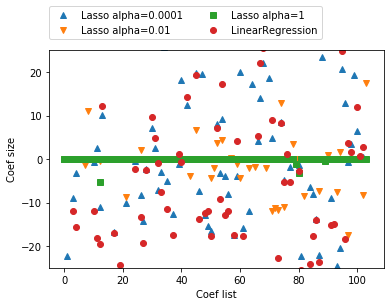

In [14]:
# α 값의 변화에 따른 가중치 (coef_)의 변화
plt.plot(model_lasso00001.coef_, '^', label='Lasso alpha=0.0001')
plt.plot(model_lasso001.coef_, 'v', label='Lasso alpha=0.01')
plt.plot(model_lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(mode_lr.coef_, 'o', label='LinearRegression')

plt.hlines(0, 0, len(mode_lr.coef_))

plt.xlabel("Coef list") # 가중치(w) 목록
plt.ylabel("Coef size") # 가중치(w) 값

plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0, 1.05))

- alpha=1일 때 가중치가 대부분 0
- alpha=0.01이면 0이 되는 특성이 약간 감소
- alpha=0.0001이면 규제가 약해져서 값도 커짐

- alpha=0.1인 리지 회귀는 alpha=0.01인 라쏘 회귀와 성능이 비슷하지만 리지 회귀를 사용하면 어떤 계수도 0이 되지 않음.

- 보통 리지 회귀를 주로 사용하지만 특성이 많고 그 중 일부분만 사용하고자 한다면 라쏘가 좋은 선택

#### 다항회귀

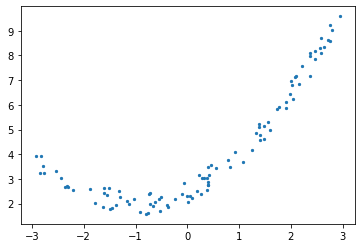

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 100

x = 6 * np.random.rand(n, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.rand(n, 1)

plt.scatter(x, y, s=5)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 데이터 변환 과정과 머신러닝을 연결해주는 파이프라인
from sklearn.pipeline import make_pipeline

# poly_features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
x.shape, x_poly.shape

((100, 1), (100, 2))

In [17]:
x[0], x_poly[0]

(array([1.56127869]), array([1.56127869, 2.43759115]))

In [18]:
# model.coef_, model.intercept_
model = LinearRegression()
model.fit(x_poly, y)
model.coef_, model.intercept_

(array([[1.00568172, 0.4952673 ]]), array([2.48094753]))

In [19]:
# make_pipeline
model_lr = make_pipeline(poly_features, LinearRegression()).fit(x, y)
print(model_lr.steps[1][1].coef_)

[[1.00568172 0.4952673 ]]


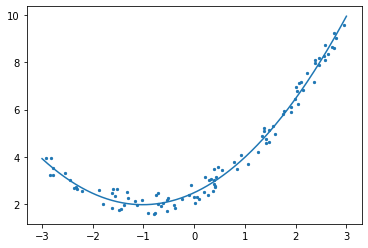

In [20]:
# 다항회귀 그래프
plt.scatter(x, y, s=5)
# x_poly.shape
# y.shape
# x.shape
xx = np.linspace(-3, 3, 1000)
plt.plot(xx, model_lr.predict(xx[:, np.newaxis]))   # newaxis = None
plt.show()

#### PolynomialFeatures()
```
PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True)
```

- degree : 차수
- interaction_only: True면 2차항에서 상호작용항만 출력
- include_bias : 상수항 생성 여부


다항 변환

- 입력값  x 를 다항식으로 변환한다.

> \\( x \;\; \rightarrow \;\; [ 1, x, x^2, x^3, \cdots ] \\) <br>
 
> 만약 열의 갯수가 두 개이고 2차 다항식으로 변환하는 경우에는 다음처럼 변환한다.

> \\( [x_1, x_2] \;\; \rightarrow \;\; [ 1, x_1, x_2, x_1^2, x_2^2, x_1x_2 ] \\)
 

In [21]:
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [22]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [23]:
poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])